### Import the relevant libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
sns.set()

### Load the data

In [2]:
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [4]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({"Yes":1,"No":0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


### Define variables

In [5]:
y = data['Admitted']
x1 = data['SAT']

#### Scatter plot

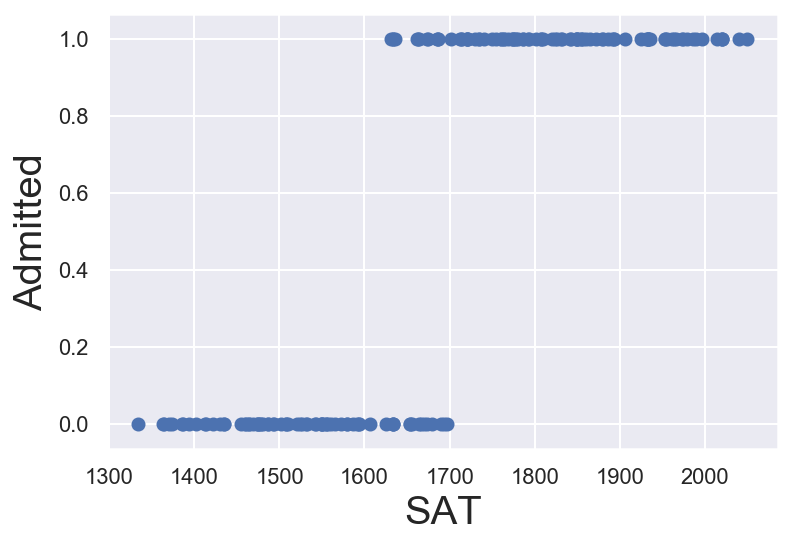

In [8]:
plt.scatter(x1,y)
plt.xlabel("SAT", fontsize = 20)
plt.ylabel("Admitted", fontsize = 20)
plt.show()

### Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


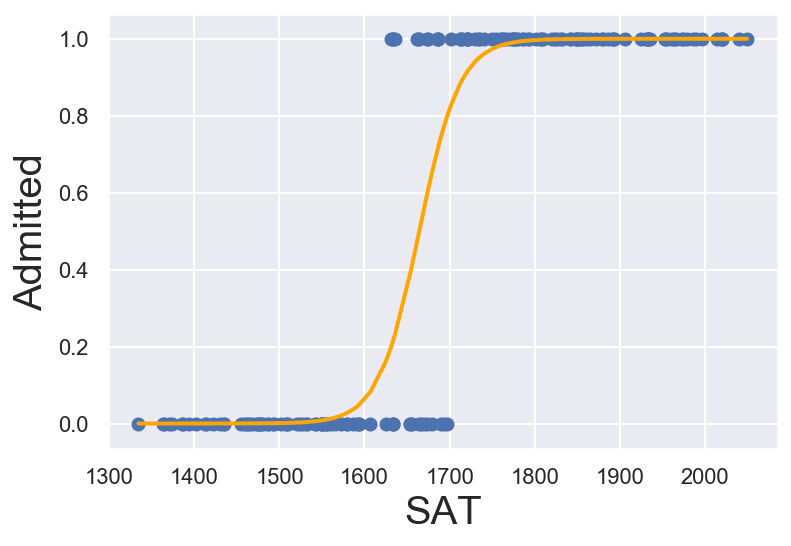

In [29]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
result = reg_log.fit()

# result.params

def f(x1,b0,b1):
    return np.array(np.exp(b0+x1*b1) / (1+np.exp(b0+x1*b1)))
                    
f_sorted = np.sort(f(x1,result.params[0],result.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y)
plt.xlabel("SAT",fontsize = 20)
plt.ylabel("Admitted", fontsize = 20)
plt.plot(x_sorted, f_sorted, color = 'orange', linewidth = 2)
plt.show()

In [31]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sat, 25 Jan 2020   Pseudo R-squ.:                  0.7992
Time:                        18:33:27   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""